In [2]:
import os
import cv2
import numpy as np
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from IPython.display import display, Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam

In [2]:


# Function to load and preprocess images
def load_and_preprocess_data(data_dir, image_size):
    images = []
    labels = []

    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            for file_name in os.listdir(class_path):
                file_path = os.path.join(class_path, file_name)
                image = cv2.imread(file_path)
                image = cv2.resize(image, (image_size, image_size))
                images.append(image)
                labels.append(class_name)

    # Convert images and labels to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)

    # Convert labels to numerical format
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    labels = to_categorical(labels)

    return images, labels, label_encoder

# Function to display randomly selected images
def display_random_images(images, labels, class_names, label_encoder, num_images=10):
    indices = np.random.choice(len(images), num_images, replace=False)
    
    for i, idx in enumerate(indices):
        image = Image(data=images[idx].astype(np.uint8))
        display(image)
        print(f"Class: {class_names[labels[idx].argmax()]}")

# Set the path to your training and testing directories
train_dir = './augmented_data/train'
test_dir =  './augmented_data/validation'

# Define the image size (adjust based on your requirements)
image_size = 128

# Load and preprocess training data
X_train, y_train, label_encoder = load_and_preprocess_data(train_dir, image_size)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Load and preprocess testing data
X_test, y_test, _ = load_and_preprocess_data(test_dir, image_size)  # Note: Use a different label encoder for testing data

# Load pre-trained VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Extract features using VGG16 for training data
X_train_features = vgg_model.predict(X_train)
X_val_features = vgg_model.predict(X_val)
X_test_features = vgg_model.predict(X_test)

# Flatten the features
X_train_flatten = X_train_features.reshape(X_train_features.shape[0], -1)
X_val_flatten = X_val_features.reshape(X_val_features.shape[0], -1)
X_test_flatten = X_test_features.reshape(X_test_features.shape[0], -1)

# Build a model with four hidden layers
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train_flatten.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(9, activation='softmax'))  # 9 classes

# Compile the model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(X_train_flatten, y_train, epochs=10, validation_data=(X_val_flatten, y_val))





29/29 [==============================] - 35s 1s/step
Epoch 1/10


328/328 [==============================] - 6s 14ms/step - loss: 0.9209 - accuracy: 0.7310 - val_loss: 0.5420 - val_accuracy: 0.8037
Epoch 2/10
328/328 [==============================] - 5s 14ms/step - loss: 0.2612 - accuracy: 0.9055 - val_loss: 0.4273 - val_accuracy: 0.8580
Epoch 3/10
328/328 [==============================] - 5s 15ms/step - loss: 0.1679 - accuracy: 0.9429 - val_loss: 0.3963 - val_accuracy: 0.8751
Epoch 4/10
328/328 [==============================] - 4s 13ms/step - loss: 0.1400 - accuracy: 0.9531 - val_loss: 0.4268 - val_accuracy: 0.8709
Epoch 5/10
328/328 [==============================] - 5s 14ms/step - loss: 0.1263 - accuracy: 0.9581 - val_loss: 0.4599 - val_accuracy: 0.8683
Epoch 6/10
328/328 [==============================] - 5s 14ms/step - loss: 0.0864 - accuracy: 0.9721 - val_loss: 0.5200 - val_accuracy: 0.8641
Epoch 7/10
328/328 [==============================] - 5s 14ms/step - loss: 0.0919 - a

In [3]:
model.compile(optimizer=Adam(learning_rate=0.002), loss='categorical_crossentropy', metrics=['accuracy'])
history1=model.fit(X_train_flatten, y_train, epochs=10, validation_data=(X_val_flatten, y_val))



Epoch 1/10
328/328 [==============================] - 8s 19ms/step - loss: 0.2732 - accuracy: 0.9315 - val_loss: 0.4844 - val_accuracy: 0.8744
Epoch 2/10
328/328 [==============================] - 5s 17ms/step - loss: 0.1782 - accuracy: 0.9536 - val_loss: 0.5050 - val_accuracy: 0.8751
Epoch 3/10
328/328 [==============================] - 5s 15ms/step - loss: 0.1162 - accuracy: 0.9705 - val_loss: 0.5941 - val_accuracy: 0.8713
Epoch 4/10
328/328 [==============================] - 5s 15ms/step - loss: 0.1004 - accuracy: 0.9749 - val_loss: 0.7980 - val_accuracy: 0.8415
Epoch 5/10
328/328 [==============================] - 5s 15ms/step - loss: 0.0970 - accuracy: 0.9734 - val_loss: 0.5528 - val_accuracy: 0.8858
Epoch 6/10
328/328 [==============================] - 5s 16ms/step - loss: 0.0503 - accuracy: 0.9869 - val_loss: 0.5948 - val_accuracy: 0.8816
Epoch 7/10
328/328 [==============================] - 5s 15ms/step - loss: 0.0353 - accuracy: 0.9910 - val_loss: 0.6815 - val_accuracy: 0.8912

In [4]:
model.compile(optimizer=Adam(learning_rate=0.0025), loss='categorical_crossentropy', metrics=['accuracy'])
history2=model.fit(X_train_flatten, y_train, epochs=10, validation_data=(X_val_flatten, y_val))

Epoch 1/10
328/328 [==============================] - 7s 17ms/step - loss: 0.1430 - accuracy: 0.9709 - val_loss: 0.8366 - val_accuracy: 0.8698
Epoch 2/10
328/328 [==============================] - 5s 16ms/step - loss: 0.1491 - accuracy: 0.9668 - val_loss: 0.6987 - val_accuracy: 0.8759
Epoch 3/10
328/328 [==============================] - 5s 16ms/step - loss: 0.1387 - accuracy: 0.9792 - val_loss: 0.5796 - val_accuracy: 0.8755
Epoch 4/10
328/328 [==============================] - 5s 16ms/step - loss: 0.0525 - accuracy: 0.9878 - val_loss: 0.7826 - val_accuracy: 0.8729
Epoch 5/10
328/328 [==============================] - 5s 16ms/step - loss: 0.0238 - accuracy: 0.9950 - val_loss: 0.7150 - val_accuracy: 0.8893
Epoch 6/10
328/328 [==============================] - 5s 16ms/step - loss: 0.0549 - accuracy: 0.9883 - val_loss: 0.9892 - val_accuracy: 0.8858
Epoch 7/10
328/328 [==============================] - 5s 16ms/step - loss: 0.0497 - accuracy: 0.9888 - val_loss: 1.0247 - val_accuracy: 0.8820

In [5]:
from tensorflow.keras.utils import plot_model

model.summary()


# Assuming 'model' is the variable that holds your custom model
plot_model(model, to_file='custom_model.png', show_shapes=True, show_layer_names=True)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 9)                 297       
                                                                 
Total params: 2140937 (8.17 MB)
Trainable params: 2140937 (8.17 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
You must install p

In [6]:

# Define the paths to your dataset
train_path =  './augmented_data/train'
test_path =   './augmented_data/validation'

# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Rescaling for the test set
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training set
train_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),  # Adjust size based on your model requirements
    batch_size=32,
    class_mode='categorical'
)

# Load the test set
test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


def build_resnet_model(input_shape, num_classes):
    input_layer = Input(shape=input_shape)
    
    # Initial Convolution
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='valid')(input_layer)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Residual Blocks
    for _ in range(3):
        x = residual_block(x, 64)

    for downsample in [True, False]:
        x = residual_block(x, 128, downsample)

    for downsample in [True, False]:
        x = residual_block(x, 256, downsample)

    for downsample in [True, False]:
        x = residual_block(x, 512, downsample)

    # Global Average Pooling
    x = layers.GlobalAveragePooling2D()(x)

    # Fully Connected Layer
    output_layer = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model

def residual_block(x, filters, downsample=False):
    shortcut = x

    # First Convolution
    x = layers.Conv2D(filters, (3, 3), strides=(1 if not downsample else 2, 1 if not downsample else 2), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # Second Convolution
    x = layers.Conv2D(filters, (3, 3), strides=(1, 1), padding='same')(x)
    x = layers.BatchNormalization()(x)

    # Shortcut connection
    if downsample:
        shortcut = layers.Conv2D(filters, (1, 1), strides=(2, 2), padding='valid')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)
    
    return x



Found 13093 images belonging to 9 classes.
Found 897 images belonging to 9 classes.


In [7]:

# Build the model
input_shape = (224, 224, 3)  # Adjust based on your image dimensions
num_classes = 9  # Number of classes in your dataset
model = build_resnet_model(input_shape, num_classes)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history_res = model.fit(
    train_set,
    epochs=10,  # Adjust based on your requirements
    validation_data=test_set
)
            

Epoch 1/10
410/410 [==============================] - 817s 2s/step - loss: 0.9045 - accuracy: 0.6872 - val_loss: 2.9265 - val_accuracy: 0.4515
Epoch 2/10
410/410 [==============================] - 798s 2s/step - loss: 0.5947 - accuracy: 0.7866 - val_loss: 1.9661 - val_accuracy: 0.6410
Epoch 3/10
410/410 [==============================] - 797s 2s/step - loss: 0.4908 - accuracy: 0.8252 - val_loss: 0.7129 - val_accuracy: 0.7726
Epoch 4/10
410/410 [==============================] - 795s 2s/step - loss: 0.4216 - accuracy: 0.8466 - val_loss: 9.6578 - val_accuracy: 0.2965
Epoch 5/10
410/410 [==============================] - 767s 2s/step - loss: 0.3743 - accuracy: 0.8619 - val_loss: 5.0846 - val_accuracy: 0.4426
Epoch 6/10
410/410 [==============================] - 744s 2s/step - loss: 0.3177 - accuracy: 0.8808 - val_loss: 0.8033 - val_accuracy: 0.7269
Epoch 7/10
410/410 [==============================] - 807s 2s/step - loss: 0.3031 - accuracy: 0.8870 - val_loss: 0.4160 - val_accuracy: 0.8584

In [8]:
model.compile(optimizer=Adam(learning_rate=0.002), loss='categorical_crossentropy', metrics=['accuracy'])

history_res_1 = model.fit(
    train_set,
    epochs=10,  # Adjust based on your requirements
    validation_data=test_set
)

Epoch 1/10
410/410 [==============================] - 863s 2s/step - loss: 0.3839 - accuracy: 0.8625 - val_loss: 0.7636 - val_accuracy: 0.7759
Epoch 2/10
410/410 [==============================] - 819s 2s/step - loss: 0.2992 - accuracy: 0.8847 - val_loss: 0.4055 - val_accuracy: 0.8796
Epoch 3/10
410/410 [==============================] - 833s 2s/step - loss: 0.2714 - accuracy: 0.8976 - val_loss: 0.8256 - val_accuracy: 0.8183
Epoch 4/10
410/410 [==============================] - 767s 2s/step - loss: 0.2391 - accuracy: 0.9076 - val_loss: 0.2044 - val_accuracy: 0.9443
Epoch 5/10
410/410 [==============================] - 793s 2s/step - loss: 0.2410 - accuracy: 0.9064 - val_loss: 0.6027 - val_accuracy: 0.7949
Epoch 6/10
410/410 [==============================] - 856s 2s/step - loss: 0.2095 - accuracy: 0.9193 - val_loss: 0.2175 - val_accuracy: 0.9431
Epoch 7/10
410/410 [==============================] - 827s 2s/step - loss: 0.1890 - accuracy: 0.9269 - val_loss: 0.4121 - val_accuracy: 0.8919

In [9]:
model.compile(optimizer=Adam(learning_rate=0.0025), loss='categorical_crossentropy', metrics=['accuracy'])

history_res_2 = model.fit(
    train_set,
    epochs=10,  # Adjust based on your requirements
    validation_data=test_set
)

Epoch 1/10
410/410 [==============================] - 831s 2s/step - loss: 0.1967 - accuracy: 0.9249 - val_loss: 0.4181 - val_accuracy: 0.8595
Epoch 2/10
410/410 [==============================] - 795s 2s/step - loss: 0.1817 - accuracy: 0.9274 - val_loss: 0.4895 - val_accuracy: 0.8573
Epoch 3/10
410/410 [==============================] - 774s 2s/step - loss: 0.1818 - accuracy: 0.9302 - val_loss: 0.1569 - val_accuracy: 0.9376
Epoch 4/10
410/410 [==============================] - 774s 2s/step - loss: 0.1583 - accuracy: 0.9356 - val_loss: 0.4550 - val_accuracy: 0.8395
Epoch 5/10
410/410 [==============================] - 772s 2s/step - loss: 0.1536 - accuracy: 0.9379 - val_loss: 1.0203 - val_accuracy: 0.8395
Epoch 6/10
410/410 [==============================] - 765s 2s/step - loss: 0.1708 - accuracy: 0.9344 - val_loss: 0.4786 - val_accuracy: 0.8551
Epoch 7/10
410/410 [==============================] - 779s 2s/step - loss: 0.1392 - accuracy: 0.9454 - val_loss: 0.6121 - val_accuracy: 0.7804

In [10]:
# Load the pre-trained DenseNet121 model
densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the pre-trained model
for layer in densenet_model.layers:
    layer.trainable = False

# Build a custom model on top of DenseNet
model = models.Sequential()
model.add(densenet_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(9, activation='softmax'))  # 9 classes

# Compile the model with 'learning_rate' instead of 'lr'
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_dense = model.fit(train_set, epochs=10, validation_data=test_set)

# Evaluate the model
test_accuracy = model.evaluate(test_set)[1]
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/10
410/410 [==============================] - 543s 1s/step - loss: 1.1846 - accuracy: 0.5511 - val_loss: 0.3926 - val_accuracy: 0.8540
Epoch 2/10
410/410 [==============================] - 505s 1s/step - loss: 0.6168 - accuracy: 0.7724 - val_loss: 0.2681 - val_accuracy: 0.9130
Epoch 3/10
410/410 [==============================] - 487s 1s/step - loss: 0.5005 - accuracy: 0.8177 - val_loss: 0.2591 - val_accuracy: 0.9153
Epoch 4/10
410/410 [==============================] - 538s 1s/step - loss: 0.4441 - accuracy: 0.8431 - val_loss: 0.2348 - val_accuracy: 0.9208
Epoch 5/10
410/410 [==============================] - 540s 1s/step - loss: 0.4001 - accuracy: 0.8560 - val_loss: 0.2171 - val_accuracy: 0.9320
Epoch 6/10
410/410 [==============================] - 1407s 3s/step - loss: 0.3788 - accuracy: 0.8647 - val_loss: 0.2179 - val_accuracy: 0.9420
Epoch 7/10
410/410 [==============================] - 489s 1s/step - loss: 0.3700 - accuracy: 0.8681 - val_loss: 0.1512 - val_accuracy: 0.953

In [11]:
model.compile(optimizer=Adam(learning_rate=0.002), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_dense_1 = model.fit(train_set, epochs=10, validation_data=test_set)

# Evaluate the model
test_accuracy = model.evaluate(test_set)[1]
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/10
410/410 [==============================] - 542s 1s/step - loss: 0.4237 - accuracy: 0.8474 - val_loss: 0.2113 - val_accuracy: 0.9342
Epoch 2/10
410/410 [==============================] - 539s 1s/step - loss: 0.4147 - accuracy: 0.8552 - val_loss: 0.1393 - val_accuracy: 0.9643
Epoch 3/10
410/410 [==============================] - 508s 1s/step - loss: 0.4112 - accuracy: 0.8557 - val_loss: 0.1796 - val_accuracy: 0.9409
Epoch 4/10
410/410 [==============================] - 493s 1s/step - loss: 0.4216 - accuracy: 0.8504 - val_loss: 0.2108 - val_accuracy: 0.9409
Epoch 5/10
410/410 [==============================] - 493s 1s/step - loss: 0.4151 - accuracy: 0.8531 - val_loss: 0.1379 - val_accuracy: 0.9699
Epoch 6/10
410/410 [==============================] - 498s 1s/step - loss: 0.3987 - accuracy: 0.8563 - val_loss: 0.1785 - val_accuracy: 0.9487
Epoch 7/10
410/410 [==============================] - 487s 1s/step - loss: 0.4071 - accuracy: 0.8578 - val_loss: 0.1863 - val_accuracy: 0.9353

In [12]:
model.compile(optimizer=Adam(learning_rate=0.0025), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_dense_2 = model.fit(train_set, epochs=10, validation_data=test_set)

# Evaluate the model
test_accuracy = model.evaluate(test_set)[1]
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/10
410/410 [==============================] - 572s 1s/step - loss: 0.4135 - accuracy: 0.8617 - val_loss: 0.1777 - val_accuracy: 0.9476
Epoch 2/10
410/410 [==============================] - 659s 2s/step - loss: 0.4117 - accuracy: 0.8566 - val_loss: 0.1849 - val_accuracy: 0.9376
Epoch 3/10
410/410 [==============================] - 668s 2s/step - loss: 0.4391 - accuracy: 0.8561 - val_loss: 0.1984 - val_accuracy: 0.9599
Epoch 4/10
410/410 [==============================] - 653s 2s/step - loss: 0.4447 - accuracy: 0.8495 - val_loss: 0.2284 - val_accuracy: 0.9331
Epoch 5/10
410/410 [==============================] - 637s 2s/step - loss: 0.4301 - accuracy: 0.8514 - val_loss: 0.2009 - val_accuracy: 0.9443
Epoch 6/10
410/410 [==============================] - 572s 1s/step - loss: 0.4322 - accuracy: 0.8503 - val_loss: 0.2321 - val_accuracy: 0.9365
Epoch 7/10
410/410 [==============================] - 505s 1s/step - loss: 0.4162 - accuracy: 0.8565 - val_loss: 0.1910 - val_accuracy: 0.9420

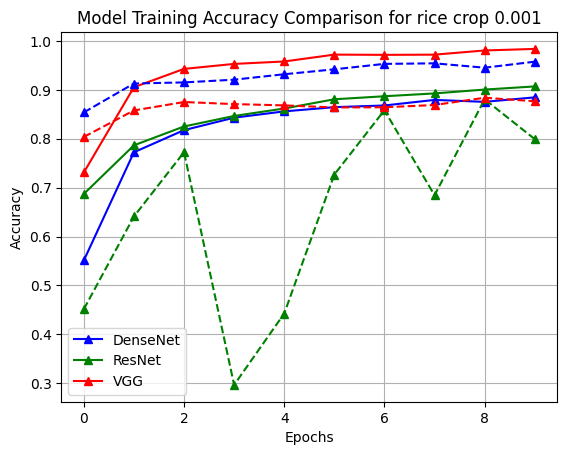

In [13]:
import matplotlib.pyplot as plt

# Assuming you have three history objects: history_dense, history_res, and history

# Plot training accuracy
plt.plot(history_dense.history['accuracy'], label='DenseNet', marker='^', color='blue')
plt.plot(history_res.history['accuracy'], label='ResNet', marker='^', color='green')
plt.plot(history.history['accuracy'], label='VGG', marker='^', color='red')

# Plot validation accuracy
plt.plot(history_dense.history['val_accuracy'], linestyle='dashed', marker='^', color='blue')
plt.plot(history_res.history['val_accuracy'], linestyle='dashed', marker='^', color='green')
plt.plot(history.history['val_accuracy'], linestyle='dashed', marker='^', color='red')

# Customize the plot
plt.title('Model Training Accuracy Comparison for rice crop 0.001')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


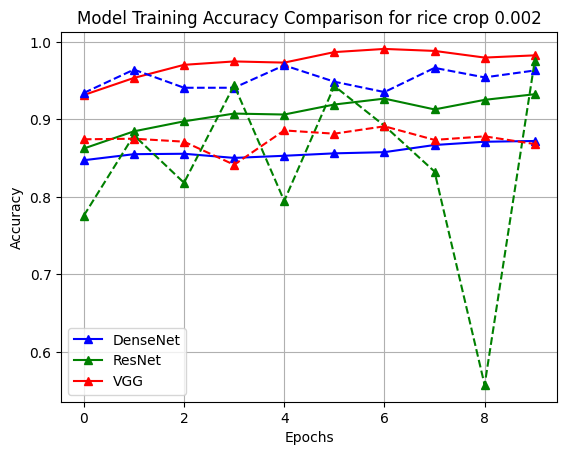

In [14]:
import matplotlib.pyplot as plt

# Assuming you have three history objects: history_dense, history_res, and history

# Plot training accuracy
plt.plot(history_dense_1.history['accuracy'], label='DenseNet', marker='^', color='blue')
plt.plot(history_res_1.history['accuracy'], label='ResNet', marker='^', color='green')
plt.plot(history1.history['accuracy'], label='VGG', marker='^', color='red')

# Plot validation accuracy
plt.plot(history_dense_1.history['val_accuracy'], linestyle='dashed', marker='^', color='blue')
plt.plot(history_res_1.history['val_accuracy'], linestyle='dashed', marker='^', color='green')
plt.plot(history1.history['val_accuracy'], linestyle='dashed', marker='^', color='red')

# Customize the plot
plt.title('Model Training Accuracy Comparison for rice crop 0.002')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


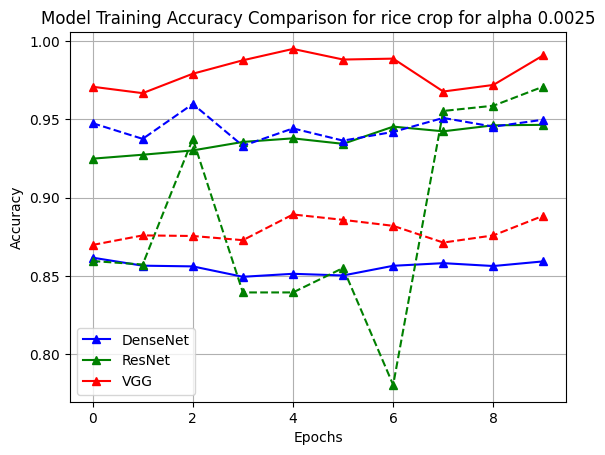

In [15]:
import matplotlib.pyplot as plt

# Assuming you have three history objects: history_dense, history_res, and history

# Plot training accuracy
plt.plot(history_dense_2.history['accuracy'], label='DenseNet', marker='^', color='blue')
plt.plot(history_res_2.history['accuracy'], label='ResNet', marker='^', color='green')
plt.plot(history2.history['accuracy'], label='VGG', marker='^', color='red')

# Plot validation accuracy
plt.plot(history_dense_2.history['val_accuracy'], linestyle='dashed', marker='^', color='blue')
plt.plot(history_res_2.history['val_accuracy'], linestyle='dashed', marker='^', color='green')
plt.plot(history2.history['val_accuracy'], linestyle='dashed', marker='^', color='red')

# Customize the plot
plt.title('Model Training Accuracy Comparison for rice crop for alpha 0.0025')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
